### 資料準備

In [50]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [51]:
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [52]:
x_train_image.shape

(60000, 28, 28)

In [53]:
y_train_label.shape

(60000,)

In [54]:
x_train=x_train_image.reshape(60000,784).astype('float32')
x_test=x_test_image.reshape(10000,784).astype('float32')

In [55]:
#標準化
x_train_normalize=x_train/255
x_test_normalize=x_test/255

In [56]:
y_train_OneHot=np_utils.to_categorical(y_train_label)
y_test_OneHot=np_utils.to_categorical(y_test_label)

### 建立模型

In [57]:
from keras.models import Sequential 
from keras.layers import Dense

#### 建立Sequential模型

In [58]:
model=Sequential()

#### 建立輸入層和隱藏層

In [59]:
model.add(Dense(units=256,                    #定義隱藏藏個數256
                input_dim=784,                #設定輸入層神經元個數為784
                kernel_initializer='normal',  #使用normal dist. 常態分佈的亂數，初始化weight和bias
                activation='relu'))           #定義激活函數為relu

h1=relu(X*W1+b1)

#### 建立輸出層

In [60]:
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

y=softmax(h1*W2+b2)

In [61]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


784*256+256=200960

256*10+10=2570

### 進行訓練

#### 在模型訓練前，要先使用complie對模型進行設定

In [62]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

### 開始訓練

In [63]:
train_history=model.fit(x=x_train_normalize,
                        y=y_train_OneHot,
                        validation_split=0.2,
                        epochs=15,
                        batch_size=200,
                        verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 2s - loss: 0.4412 - acc: 0.8819 - val_loss: 0.2187 - val_acc: 0.9404
Epoch 2/15
 - 2s - loss: 0.1916 - acc: 0.9451 - val_loss: 0.1564 - val_acc: 0.9553
Epoch 3/15
 - 2s - loss: 0.1363 - acc: 0.9613 - val_loss: 0.1271 - val_acc: 0.9638
Epoch 4/15
 - 2s - loss: 0.1038 - acc: 0.9701 - val_loss: 0.1134 - val_acc: 0.9678
Epoch 5/15
 - 2s - loss: 0.0820 - acc: 0.9774 - val_loss: 0.0994 - val_acc: 0.9709
Epoch 6/15
 - 2s - loss: 0.0668 - acc: 0.9813 - val_loss: 0.0947 - val_acc: 0.9723
Epoch 7/15
 - 2s - loss: 0.0552 - acc: 0.9850 - val_loss: 0.0917 - val_acc: 0.9733
Epoch 8/15
 - 2s - loss: 0.0466 - acc: 0.9876 - val_loss: 0.0834 - val_acc: 0.9756
Epoch 9/15
 - 2s - loss: 0.0386 - acc: 0.9900 - val_loss: 0.0825 - val_acc: 0.9761
Epoch 10/15
 - 2s - loss: 0.0322 - acc: 0.9914 - val_loss: 0.0812 - val_acc: 0.9758
Epoch 11/15
 - 2s - loss: 0.0266 - acc: 0.9939 - val_loss: 0.0792 - val_acc: 0.9765
Epoch 12/15
 - 2s - loss: 0.0222 - 

### 顯示訓練過程

In [64]:
import matplotlib.pyplot as plt 
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

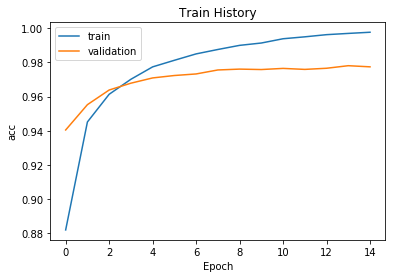

In [65]:
show_train_history(train_history,'acc','val_acc')

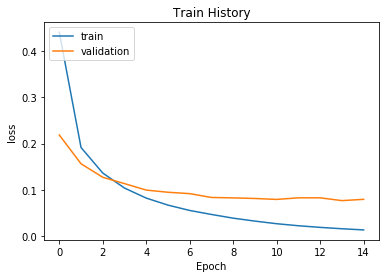

In [66]:
show_train_history(train_history,'loss','val_loss')

### Training data的score

In [69]:
result=model.evaluate(x_train_normalize,y_train_OneHot)
print('Train Accuracy=',result[1])

60000/60000 [==============================] - 2s 35us/step
Train Accuracy= 0.9942


### Training data的 loss

In [83]:
result=model.evaluate(x_train_normalize,y_train_OneHot)
print('Train Accuracy=',result[0])

60000/60000 [==============================] - 2s 36us/step
Train Accuracy= 0.024886754704045597


### 執行預測

In [72]:
prediction=model.predict_classes(x_test_normalize)
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [73]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='label='+str(labels[idx])
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

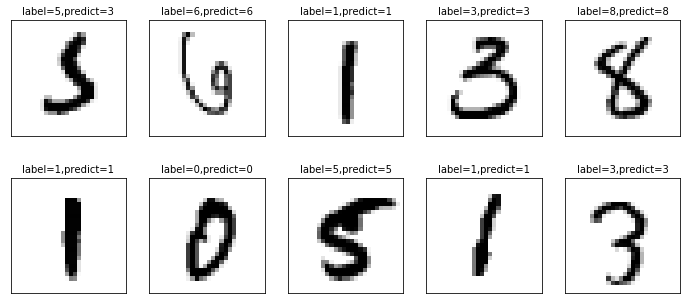

In [74]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

### 顯示混淆矩陣

In [76]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
           rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,1,1,1,0,1,1,3,0
1,0,1120,4,1,0,1,3,2,4,0
2,5,0,1007,2,1,0,2,9,6,0
3,0,0,3,986,0,4,0,6,5,6
4,2,0,2,1,957,0,3,4,1,12
5,2,0,0,7,1,871,2,2,3,4
6,6,3,1,1,4,6,937,0,0,0
7,0,4,5,1,0,0,0,1012,1,5
8,4,0,4,4,4,7,1,9,937,4


In [78]:
data=pd.DataFrame({'label':y_test_label,'predict':prediction})
data.head()

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [79]:
data[(data.label==5)&(data.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2597,5,3
4271,5,3
5937,5,3
5972,5,3


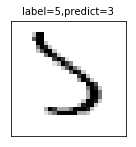

In [82]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1393,num=1)